In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
title = np.genfromtxt('data.csv', dtype=np.unicode, delimiter=',')[:1]
title

array([['km', 'price']], dtype='<U6')

In [24]:
data = np.genfromtxt('data.csv', dtype=np.uint32, delimiter=',')[1:]
data.shape

(24, 2)

In [25]:
data[:5]

array([[240000,   3650],
       [139800,   3800],
       [150500,   4400],
       [185530,   4450],
       [176000,   5250]], dtype=uint32)

In [26]:
x = np.array(data[:, 0])
y = np.array(data[:, 1])

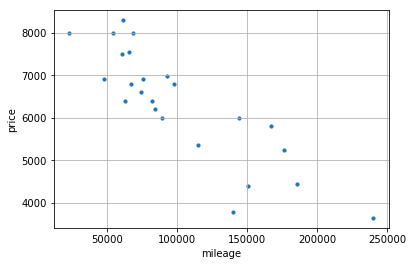

In [27]:
plt.scatter(x, y, s=10)
plt.xlabel('mileage')
plt.ylabel('price')
plt.grid()
plt.show()

In [28]:
def normalization(target, val_min, val_max):
    return (target - val_min) / (val_max - val_min)

x_minmax = np.array([np.min(x), np.max(x)])
x_norm = normalization(x, *x_minmax)

In [29]:
x_minmax

array([ 22899, 240000], dtype=uint32)

In [30]:
def learning_nn(epochs, error_border, x_norm, y, alpha):
    weight = np.array([np.random.rand(), np.max(y) / 2], np.float32)
    error = np.zeros(epochs, np.float32)
    selection = np.array([0, 1], np.float32)
    delta = np.zeros(2, np.float32)
    for epoch in range(epochs):
        # error[epoch] = (np.mean(x_norm * weight[0] + weight[1]) - np.mean(y)) ** 2
        error[epoch] = np.power(np.mean(np.stack((x_norm,
                                                    np.ones(x_norm.size)),
                                                1) @ weight) - np.mean(y), 2)
        if error[epoch] < error_border:
            return (weight, error)
        for i in range(x_norm.size):
            selection[0] = x_norm[i]
            # predict = x[i] * weight[0] + weight[1]
            predict = selection @ weight 
            # delta[0] += (predict - y[i]) * x[i]
            # delta[1] += (predict - y[i]) * 1
            delta += (predict - y[i]) * selection
        # weight[0] -= delta[0] * alpha[0]
        # weight[1] -= delta[1] * alpha[1]
        weight -= delta * alpha
        delta[:] = 0
    return (weight, error)

epochs = 100
error_border = 100
alpha = np.array([0.1, 0.01], np.float32)
weight, error = learning_nn(epochs, error_border, x_norm, y, alpha)

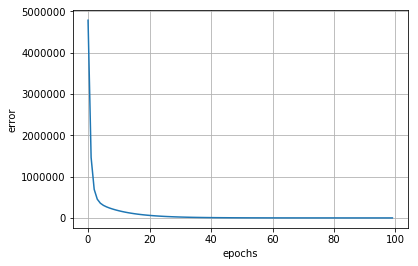

In [31]:
plt.plot(range(epochs), error)
plt.xlabel('epochs')
plt.ylabel('error')
plt.grid()
plt.show()

In [32]:
weight

array([-4559.091,  7963.828], dtype=float32)

In [33]:
# y_pred = normalization(x_minmax, *x_minmax) * weight[0] + weight[1]
y_pred = np.stack((normalization(x_minmax, *x_minmax), np.ones(x_minmax.size)), 1) @ weight


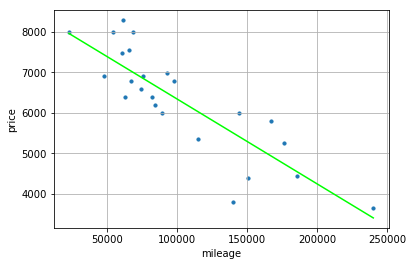

In [34]:
plt.scatter(x, y, s=10)
plt.plot(x_minmax, y_pred, c="#00FF00")
plt.xlabel('mileage')
plt.ylabel('price')
plt.grid()
plt.show()

In [35]:
def prediction(target, x_minmax, weight):
    target = normalization(target, *x_minmax)
    prediction = int(round(target * weight[0] + weight[1], 0))
    return prediction


In [36]:
prediction(240000, x_minmax, weight)

3405

In [37]:
data[data[:, 0] == 240000, 1][0]

3650